In [1]:
 
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"
 

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/faces_age")
 

In [3]:
def names(x):
    return str(x).split('/')[-1].split('_')[0]

In [4]:
names("/media/subhaditya/DATA/COSMO/Datasets/faces_age/part1/10_0_0_20161220222308131.jpg")

'10'

In [5]:
data = (ImageList.from_folder(path)
       .split_by_rand_pct()
        .label_from_func(names,label_cls=FloatList, log=False)
        .transform(get_transforms(),size = 64)
       ).databunch(bs = 64).normalize(imagenet_stats)
 

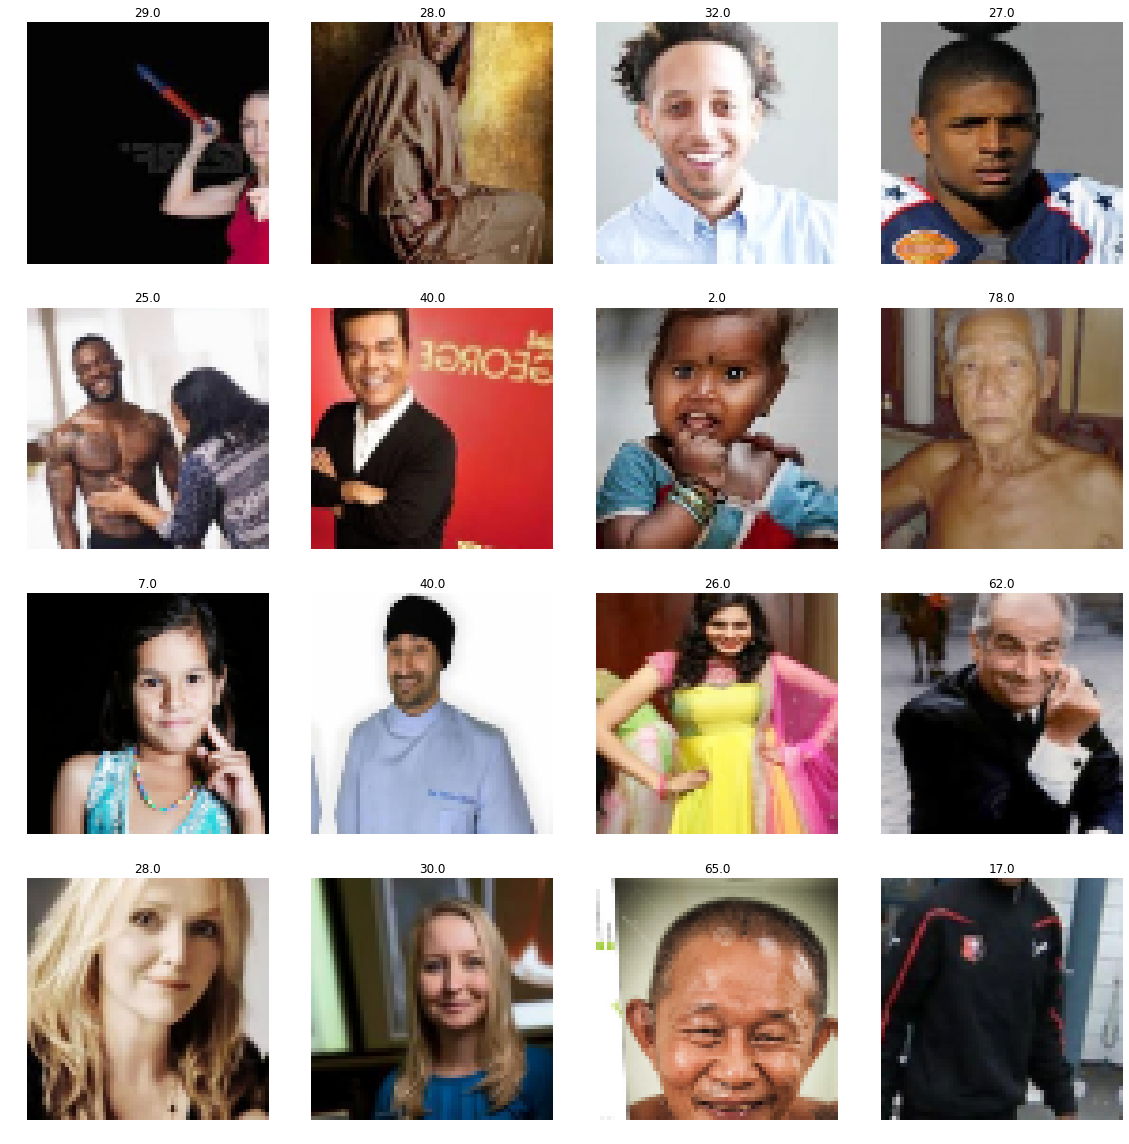

In [6]:
data.show_batch(4)
 

In [7]:
data.c
 

1

In [8]:
learn = None
gc.collect()

31438

In [9]:
from torch.optim import *

# resnet34 + mseLoss

In [130]:
learn = cnn_learner(
    data, models.resnet34, metrics=[mae], opt_func=AdamW, callback_fns=ShowGraph,loss_func = MSELossFlat()
).to_fp16()

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,1287.642090,1224.604492,32.428795,01:25
1,1131.300659,1186.834106,32.089996,01:20
2,548.262695,444.549469,17.311077,01:21
3,213.024017,174.138397,9.559262,01:23
4,186.629532,187.512360,9.862610,01:21
5,189.724289,161.208435,9.127147,01:23
6,180.020386,163.923187,9.250320,01:21
7,167.138962,167.734161,9.302856,01:22
8,155.587204,151.070557,8.839275,01:22
9,150.133560,135.576904,8.412186,01:22


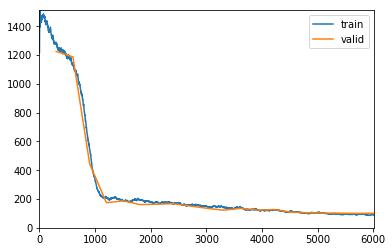

In [132]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-3, wd = 1e-3)
 

epoch,train_loss,valid_loss,mean_absolute_error,time
0,91.533020,100.725624,6.793253,01:23
1,88.145706,100.017242,6.764123,01:22
2,94.958008,97.931229,6.787288,01:21
3,88.204391,99.627609,6.819227,01:23
4,92.342796,101.154175,6.891847,01:21
5,90.963081,102.170975,6.805862,01:21
6,95.062447,100.619728,6.848657,01:22
7,86.763802,102.388481,6.802241,01:21
8,91.098045,105.708130,7.100421,01:22
9,83.484070,100.130630,6.733385,01:22


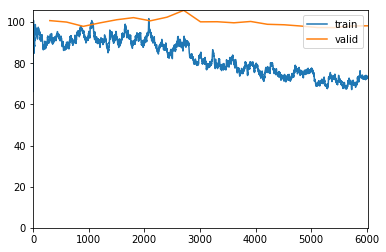

In [133]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3), wd = 1e-2)
 

In [134]:
learn.save('stage-1')

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


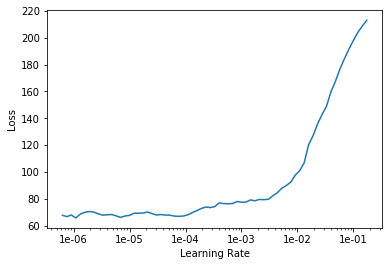

In [151]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,77.019661,106.702438,7.036465,01:22
1,120.348877,165.607239,8.873037,01:22
2,137.785110,147.147339,8.704415,01:21
3,135.729370,132.419937,8.241385,01:22
4,123.935417,118.282356,7.826389,01:22
5,121.629738,129.998047,7.846397,01:22
6,103.765526,111.347870,7.179684,01:22
7,92.236176,105.422813,7.076094,01:21
8,86.316925,102.933594,6.982141,01:22
9,84.421158,102.253365,6.864531,01:21


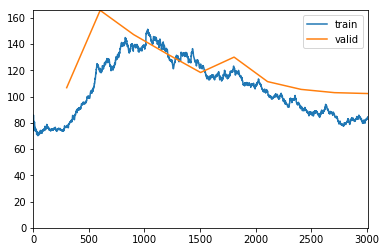

In [152]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, wd = 1e-2)
 

In [153]:
learn.save('stage-2')

In [169]:
learn.load('stage-1');

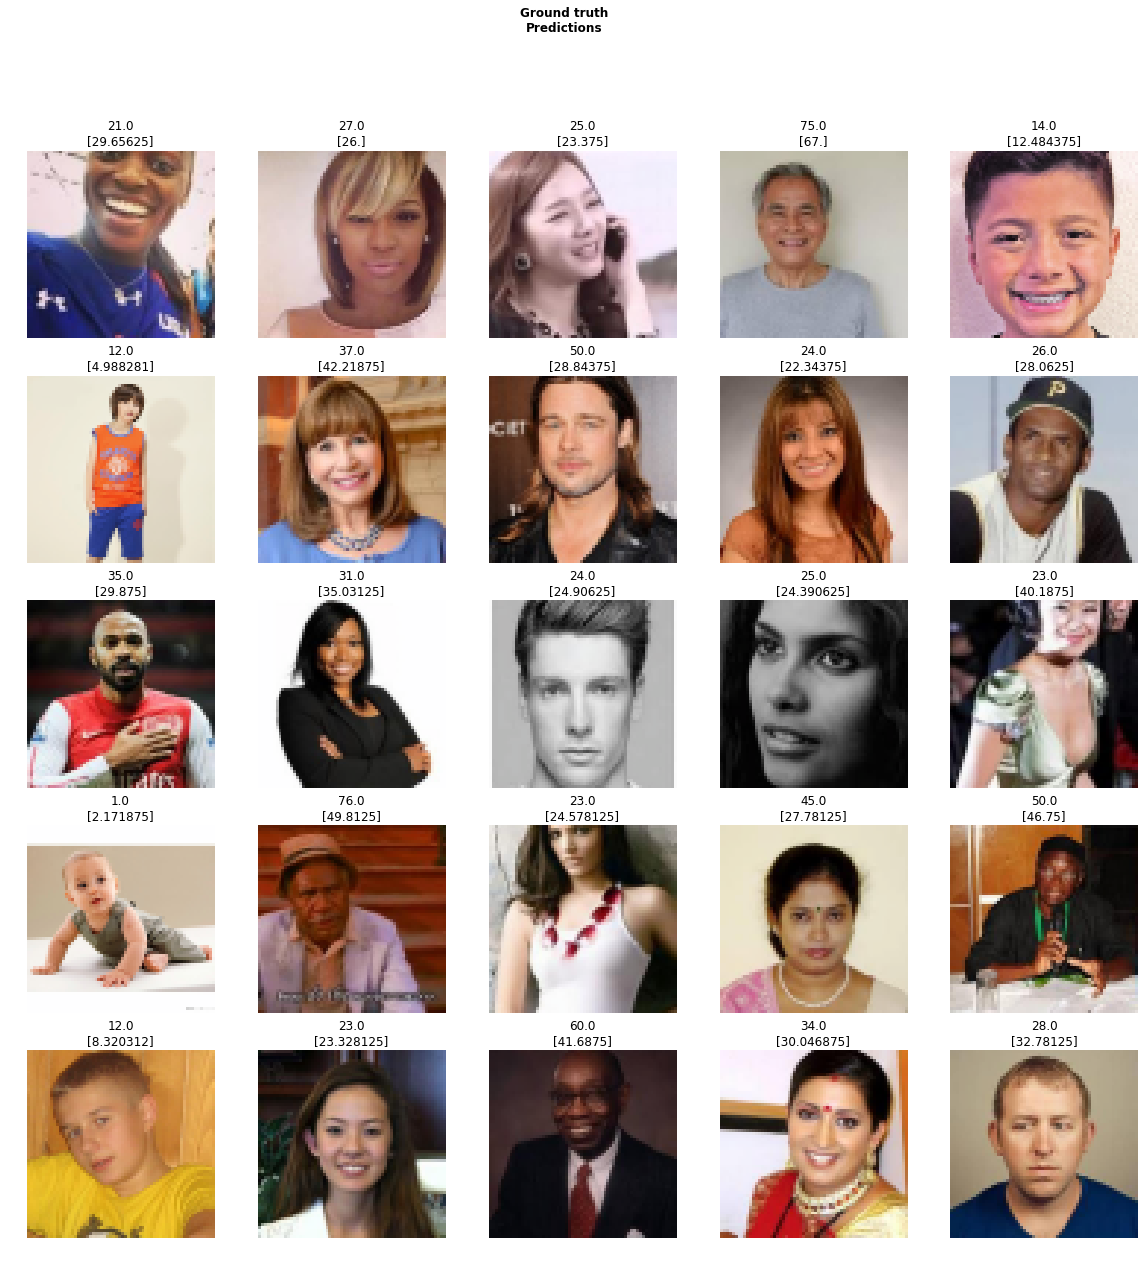

In [170]:
learn.show_results()

In [214]:
temp = os.listdir('data/');len(temp)

10

In [216]:
learn.predict(open_image('data/'+temp[0]))[0]

FloatItem [30.1875]

In [218]:
learn.predict(open_image('data/'+temp[1]))[0]

FloatItem [9.976562]

In [221]:
learn.predict(open_image('data/'+temp[2]))[0]

FloatItem [37.375]

In [223]:
learn.predict(open_image('data/'+temp[3]).rotate(-90))[0]

FloatItem [85.3125]

In [225]:
learn.predict(open_image('data/'+temp[4]))[0]

FloatItem [40.0625]

In [227]:
learn.predict(open_image('data/'+temp[5]))[0]

FloatItem [25.25]

In [246]:
learn.predict(open_image('data/'+temp[6]).rotate(-100))[0]

FloatItem [32.34375]

In [234]:
learn.predict(open_image('data/'+temp[7]))[0]

FloatItem [23.109375]

In [239]:
learn.predict(open_image('data/'+temp[8]))[0]

FloatItem [59.90625]

In [241]:
learn.predict(open_image('data/'+temp[9]).rotate(-90))[0]

FloatItem [23.796875]

## Resnet 34 + l1 loss

In [10]:
learn = None
gc.collect()

308

In [12]:
class L1LossFlat(nn.SmoothL1Loss):
    def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
        return super().forward(input.view(-1), target.view(-1))

In [14]:
learn = cnn_learner(
    data, models.resnet34, metrics=[mae], opt_func=AdamW, callback_fns=ShowGraph,loss_func = L1LossFlat()
).to_fp16()

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


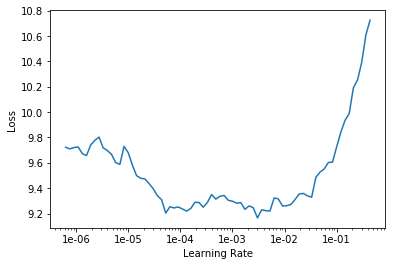

In [17]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,23.575911,17.775339,18.265875,01:18
1,14.003804,13.859067,14.346941,01:21
2,13.494987,14.263203,14.753570,01:21
3,13.329726,14.239529,14.726678,01:20
4,13.268217,13.285323,13.774371,01:23
5,13.248975,16.370049,16.860262,01:24
6,12.933546,12.652899,13.141180,01:25
7,12.347508,12.303724,12.791748,01:20
8,12.148523,11.367482,11.855644,01:22
9,11.648072,10.985839,11.470744,01:22


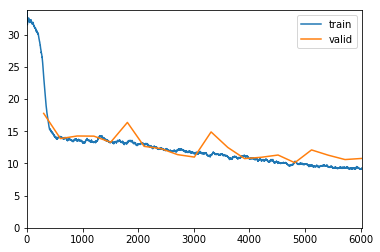

In [16]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-2, wd = 1e-3)
 

epoch,train_loss,valid_loss,mean_absolute_error,time
0,9.492006,10.159281,10.639912,01:23
1,9.122302,11.805752,12.286304,01:20
2,9.230986,10.950078,11.430272,01:21
3,9.194486,9.875407,10.356380,01:22
4,9.070693,9.242189,9.721937,01:21
5,9.296202,10.427134,10.908189,01:21
6,9.354544,11.212960,11.693346,01:22
7,9.095056,9.945743,10.426809,01:21
8,9.242157,9.748240,10.228883,01:20
9,9.108086,11.269227,11.750857,01:22


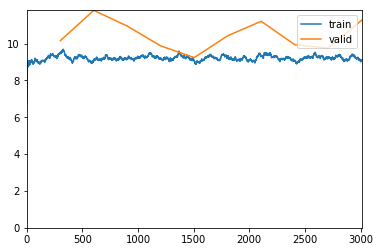

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-5), wd = 10e-3)
 

In [19]:
learn.save('stage-1-l1')

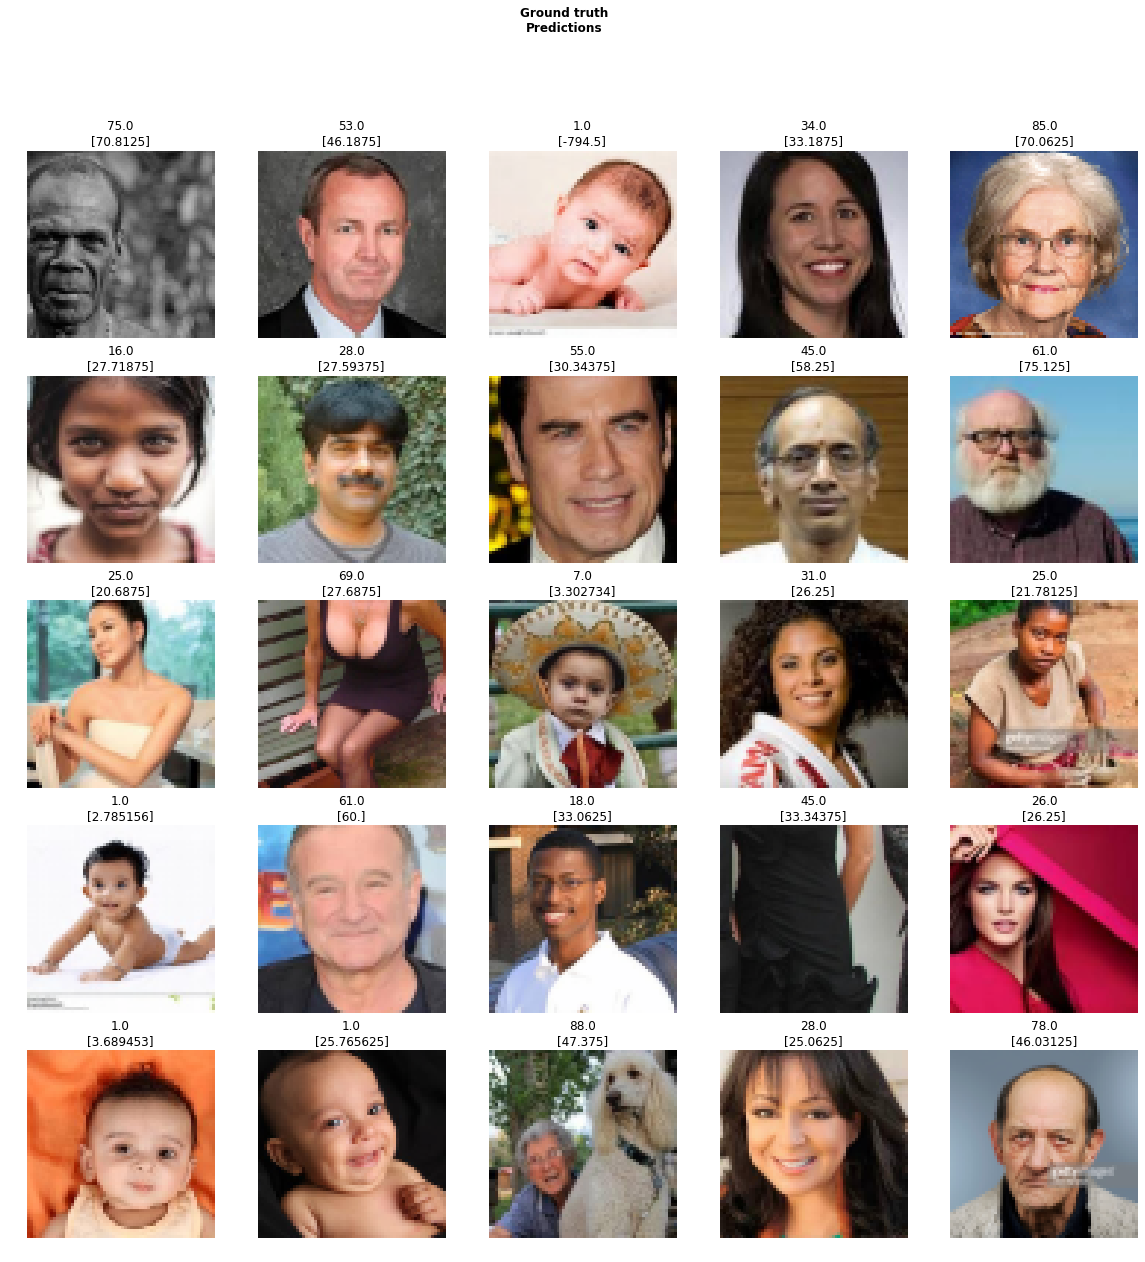

In [20]:
learn.show_results()

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, wd = 1e-2)
 

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-1');

In [ ]:
learn.show_results()

In [ ]:
temp = os.listdir('data/');len(temp)

In [ ]:
open_image('data/'+temp[0])


In [ ]:
learn.predict(open_image('data/'+temp[0]))[0]

In [ ]:
open_image('data/'+temp[1])


In [ ]:
learn.predict(open_image('data/'+temp[1]))[0]

In [ ]:
open_image('data/'+temp[2])


In [ ]:
learn.predict(open_image('data/'+temp[2]))[0]

In [ ]:
open_image('data/'+temp[3])


In [ ]:
learn.predict(open_image('data/'+temp[3]).rotate(-90))[0]

In [ ]:
open_image('data/'+temp[4])


In [ ]:
learn.predict(open_image('data/'+temp[4]))[0]

In [ ]:
open_image('data/'+temp[5])


In [ ]:
learn.predict(open_image('data/'+temp[5]))[0]

In [ ]:
open_image('data/'+temp[6]).rotate(-100)


In [ ]:
learn.predict(open_image('data/'+temp[6]).rotate(-100))[0]

In [ ]:
open_image('data/'+temp[7])


In [ ]:
learn.predict(open_image('data/'+temp[7]))[0]

In [ ]:
open_image('data/'+temp[8])


In [ ]:
learn.predict(open_image('data/'+temp[8]))[0]

In [ ]:
open_image('data/'+temp[9]).rotate(-90)


In [ ]:
learn.predict(open_image('data/'+temp[9]).rotate(-90))[0]

## Densenet

In [116]:
learn = None
gc.collect()

85715

In [121]:
from torch.optim import *

In [122]:
learn = cnn_learner(
    data, models.resnet50, metrics=[mae], opt_func=AdamW, callback_fns=ShowGraph,loss_func = MSELossFlat()
).to_fp16()

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


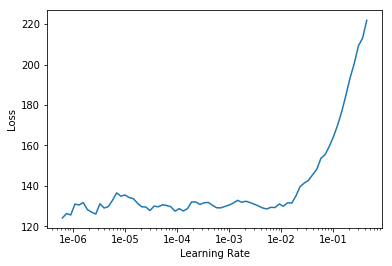

In [126]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,839.322998,857.277771,25.318453,01:24
1,352.110504,379.432190,14.566563,01:23
2,325.263000,351.386230,14.429317,01:23
3,285.545197,296.441650,12.475249,01:24
4,278.920410,260.865997,12.149814,01:24
5,264.001007,429.575989,16.327555,01:25
6,240.727478,233.908630,11.376335,01:28
7,235.243820,219.993835,11.033731,01:23
8,221.665741,228.394165,11.172359,01:23
9,229.454498,206.390305,10.303851,01:23


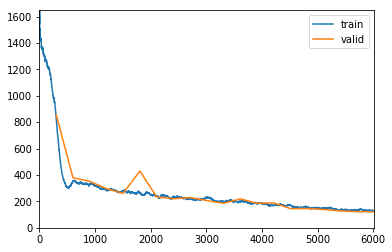

In [124]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-2, wd = 1e-3)
 

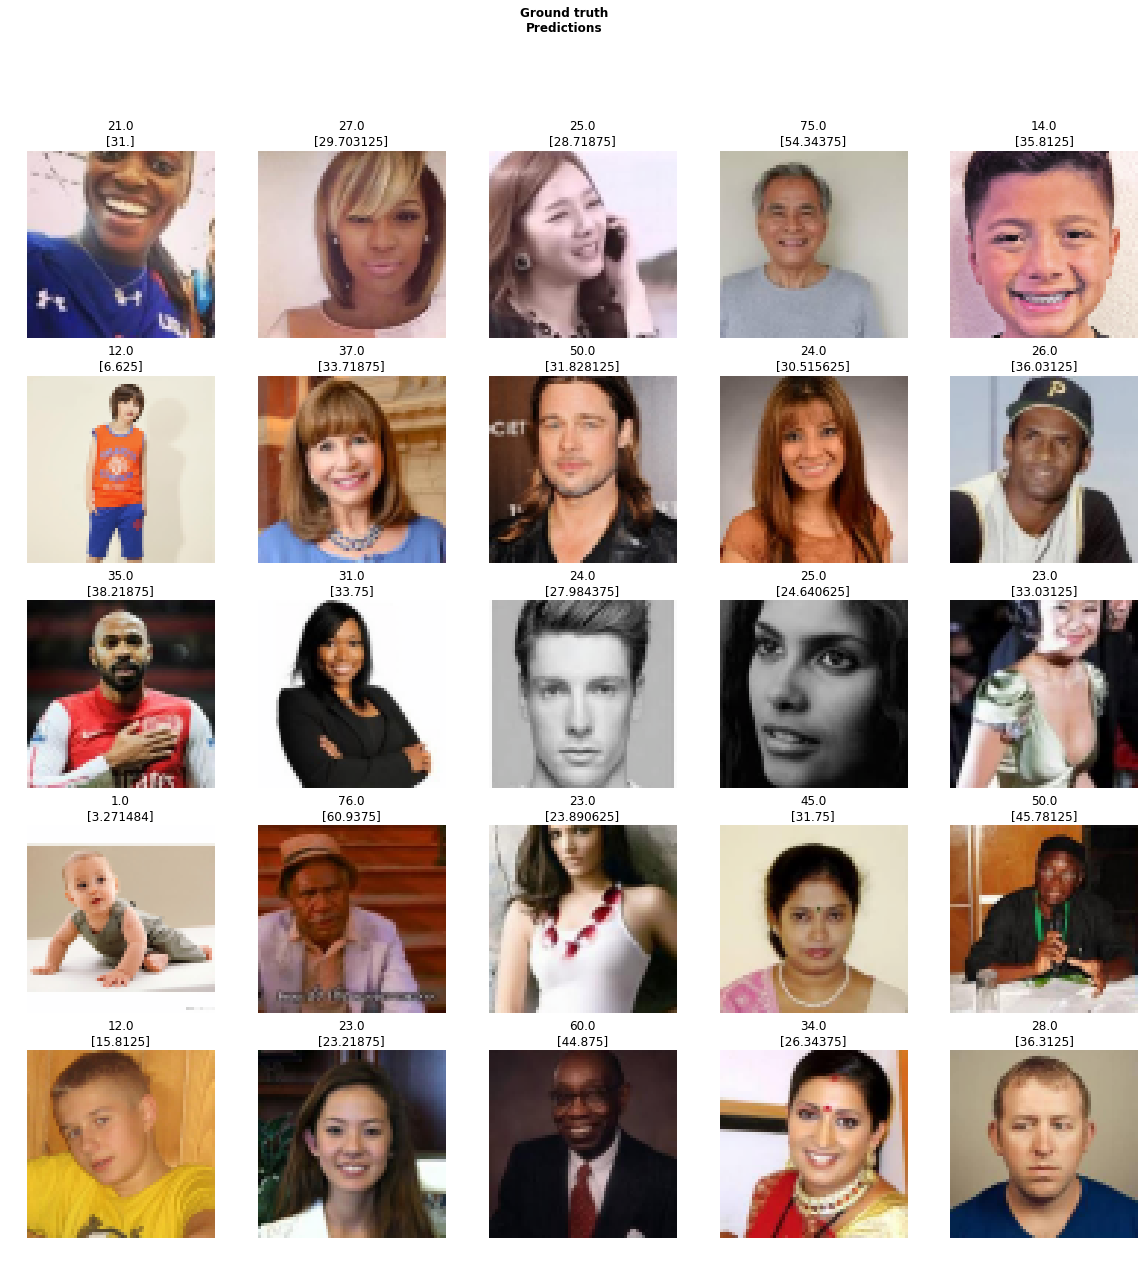

In [125]:
learn.show_results()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,129.639755,121.493660,7.793460,01:24
1,127.281212,120.971855,7.846887,01:23


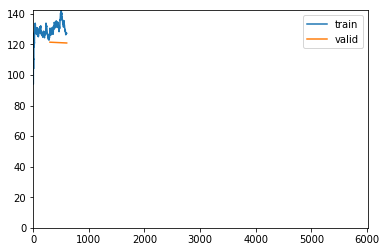

KeyboardInterrupt: 

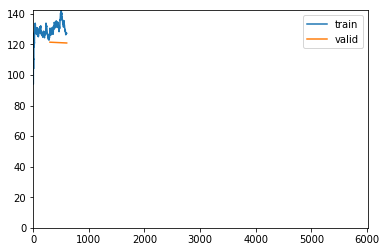

In [127]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-5), wd = 1e-2)
 

In [128]:
learn.save('dense-1')

In [ ]:
learn.show_results()

In [ ]:
temp = os.listdir('data/');len(temp)

In [ ]:
open_image('data/'+temp[0])


In [ ]:
learn.predict(open_image('data/'+temp[0]))[0]

In [ ]:
open_image('data/'+temp[1])


In [ ]:
learn.predict(open_image('data/'+temp[1]))[0]

In [ ]:
open_image('data/'+temp[2]).rotate(-90)


In [ ]:
learn.predict(open_image('data/'+temp[2]).rotate(-90))[0]

In [ ]:
open_image('data/'+temp[3])


In [ ]:
learn.predict(open_image('data/'+temp[3]))[0]

In [ ]:
open_image('data/'+temp[4])


In [ ]:
learn.predict(open_image('data/'+temp[4]))[0]

In [ ]:
open_image('data/jethu.jpg')


In [ ]:
learn.predict(open_image('data/jethu.jpg'))[0]